✅ Phenotypes saved to phenos.csv


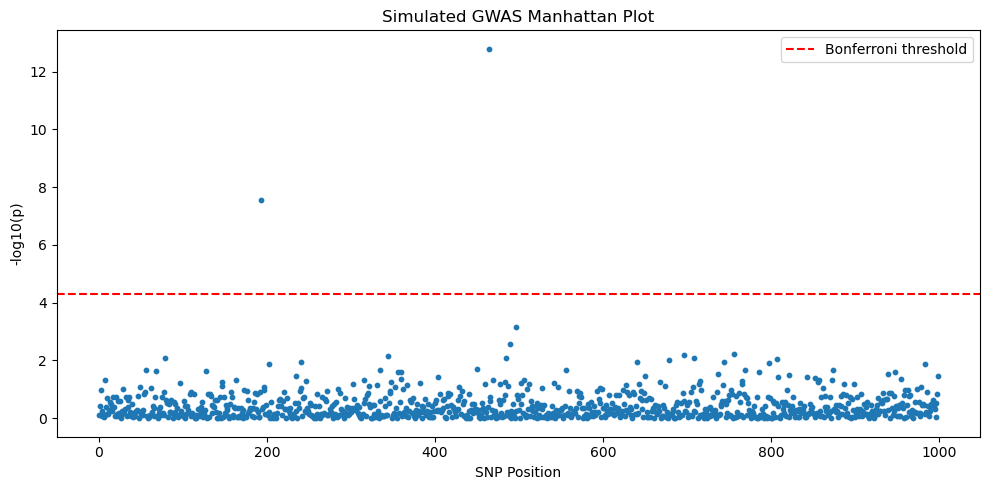

✅ GWAS analysis complete! Plot saved at: C:\Users\kakad\OneDrive\Desktop\bio6\GWAS_manhattan_plot.png


In [3]:
# ---------- Imports ----------
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import os

# ---------- Config ----------
PHENOS_PATH = "phenos.csv"      # path to your phenotypes CSV
OUT_DIR = r"C:\Users\kakad\OneDrive\Desktop\bio6"

# ---------- Step 1: Simulate genotype and phenotype ----------
np.random.seed(42)

# 100 samples, 1000 SNPs
num_samples = 100
num_snps = 1000

# Genotypes (0,1,2)
G = np.random.choice([0, 1, 2], size=(num_samples, num_snps))
G_df = pd.DataFrame(G, columns=[f"SNP_{i}" for i in range(num_snps)])

# Simulate phenotype (some SNPs affect trait)
true_effects = np.zeros(num_snps)
causal_snps = np.random.choice(num_snps, 5, replace=False)
true_effects[causal_snps] = np.random.normal(0, 1, 5)

phenotype = G.dot(true_effects) + np.random.normal(0, 1, num_samples)
phenos_df = pd.DataFrame({"Sample": [f"ID_{i}" for i in range(num_samples)],
                          "Trait": phenotype})

# Save phenotype file
os.makedirs(OUT_DIR, exist_ok=True)
phenos_df.to_csv(PHENOS_PATH, index=False)
print(f"✅ Phenotypes saved to {PHENOS_PATH}")

# ---------- Step 2: Run GWAS (no statsmodels) ----------
def run_gwas(trait_series, G_df):
    results = []
    y = np.array(trait_series)

    for snp in G_df.columns:
        x = np.array(G_df[snp])
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        results.append((snp, p_value))

    gwas_df = pd.DataFrame(results, columns=["SNP", "p"])
    gwas_df["-log10(p)"] = -np.log10(gwas_df["p"])
    gwas_df["Pos"] = range(len(gwas_df))
    return gwas_df

# Run GWAS
gwas_df = run_gwas(phenos_df["Trait"], G_df)

# ---------- Step 3: Plot Manhattan Plot ----------
plt.figure(figsize=(10, 5))
plt.scatter(gwas_df["Pos"], gwas_df["-log10(p)"], s=10)
plt.xlabel("SNP Position")
plt.ylabel("-log10(p)")
plt.title("Simulated GWAS Manhattan Plot")
plt.axhline(y=-np.log10(0.05 / num_snps), color='red', linestyle='--', label='Bonferroni threshold')
plt.legend()
plt.tight_layout()

# Save plot
plot_path = os.path.join(OUT_DIR, "GWAS_manhattan_plot.png")
plt.savefig(plot_path, dpi=300)
plt.show()

print(f"✅ GWAS analysis complete! Plot saved at: {plot_path}")
